In [1]:
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv("2017_jun_final.csv")

print(df)

         N                 Должность Язык.программирования Специализация  \
0        1        Junior QA engineer                   NaN     Manual QA   
1        2        Junior QA engineer                   NaN     Manual QA   
2        3         Software Engineer               C#/.NET           NaN   
3        4         Software Engineer            JavaScript           NaN   
4        5  Senior Software Engineer            JavaScript           NaN   
...    ...                       ...                   ...           ...   
8699  8700               QA engineer                   NaN     Manual QA   
8700  8701                 Marketing                   NaN           NaN   
8701  8702  Junior Software Engineer            Ruby/Rails           NaN   
8702  8703                 Team lead                   NaN           NaN   
8703  8704  Senior Software Engineer                  Java           NaN   

     Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0             

In [3]:
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [4]:
print(df.shape)

(8704, 25)


In [5]:
print(df.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
print(df.isnull().sum())

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [7]:
df = df.loc[:,(-df.isnull().any()) | (df.columns.isin(['Язык.программирования']))]

In [8]:
print(df.isnull().sum())

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64


In [9]:
df.dropna(inplace=True)
print(df.shape)

(4854, 20)


In [10]:
python_data = df.loc[df["Язык.программирования"] == "Python"]
print(python_data)

         N                 Должность Язык.программирования Общий.опыт.работы  \
12      13         Software Engineer                Python                 1   
68      69         Software Engineer                Python               1.5   
87      88  Junior Software Engineer                Python               0.5   
114    115  Junior Software Engineer                Python               1.5   
143    144  Junior Software Engineer                Python                 1   
...    ...                       ...                   ...               ...   
8546  8547         Software Engineer                Python                 5   
8625  8626         Software Engineer                Python                 4   
8635  8636  Senior Software Engineer                Python    10 и более лет   
8673  8674  Junior Software Engineer                Python               0.5   
8695  8696         Software Engineer                Python                 1   

     Опыт.работы.на.текущем.месте  Зарп

In [11]:
python_data.shape

(207, 20)

In [12]:
groups_by_positions = df.groupby(["Должность"])

In [13]:
min_max_salaries = groups_by_positions["Зарплата.в.месяц"].agg(["min", "max"])
print(min_max_salaries)

                                min    max
Должность                                 
Data Scientist / Data Analyst  2700   2700
DevOps                         7000   7000
ERP / CRM                      2000   2000
HTML coder                      385    600
Junior Software Engineer         75   2600
Product Manager                3000   3000
Senior Software Engineer        350   9200
Software Engineer               100   7000
System Architect                400  10000
Team lead                      2500   4000
Technical Lead                  500  18000


In [14]:
def fill_avg_salary(min_max_values):
    return min_max_values.mean()

In [15]:
avg_salaries = min_max_salaries.apply(fill_avg_salary, axis=1)
print(avg_salaries)

Должность
Data Scientist / Data Analyst    2700.0
DevOps                           7000.0
ERP / CRM                        2000.0
HTML coder                        492.5
Junior Software Engineer         1337.5
Product Manager                  3000.0
Senior Software Engineer         4775.0
Software Engineer                3550.0
System Architect                 5200.0
Team lead                        3250.0
Technical Lead                   9250.0
dtype: float64


In [16]:
min_max_salaries["avg"] = avg_salaries.astype(int).values
print(min_max_salaries)

                                min    max   avg
Должность                                       
Data Scientist / Data Analyst  2700   2700  2700
DevOps                         7000   7000  7000
ERP / CRM                      2000   2000  2000
HTML coder                      385    600   492
Junior Software Engineer         75   2600  1337
Product Manager                3000   3000  3000
Senior Software Engineer        350   9200  4775
Software Engineer               100   7000  3550
System Architect                400  10000  5200
Team lead                      2500   4000  3250
Technical Lead                  500  18000  9250


In [17]:
salaries = min_max_salaries.describe()
print(salaries)

               min           max          avg
count    11.000000     11.000000    11.000000
mean   1728.181818   6009.090909  3868.545455
std    2082.873343   5028.410195  2554.714754
min      75.000000    600.000000   492.000000
25%     367.500000   2650.000000  2350.000000
50%     500.000000   4000.000000  3250.000000
75%    2600.000000   8100.000000  4987.500000
max    7000.000000  18000.000000  9250.000000


In [18]:
salaries.to_csv("salaries.csv", index=False)

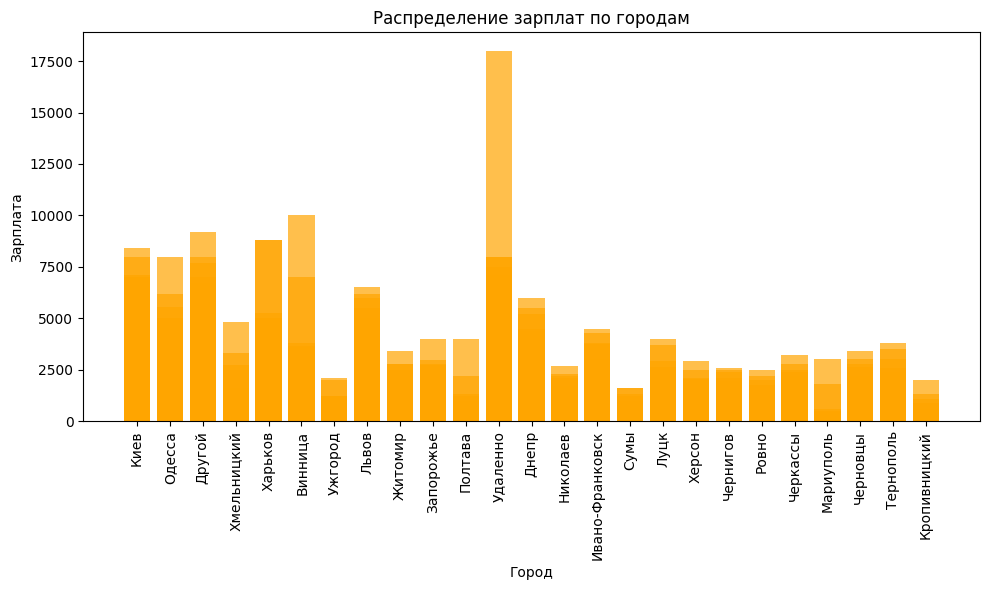

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Город'], df['salary'], color='orange', alpha=0.7)
plt.xlabel('Город')
plt.ylabel('Зарплата')
plt.title('Распределение зарплат по городам')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

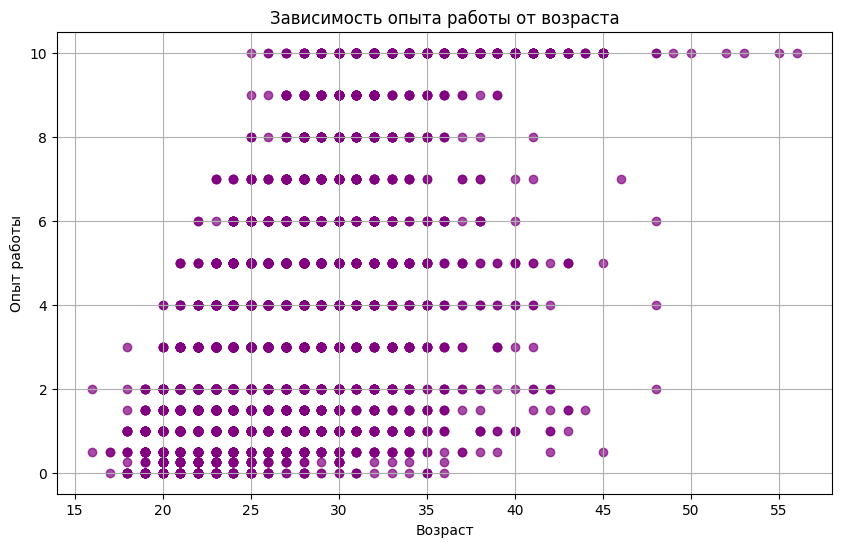

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Возраст'], df['exp'], color='purple', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Опыт работы')
plt.title('Зависимость опыта работы от возраста')
plt.grid()
plt.show()

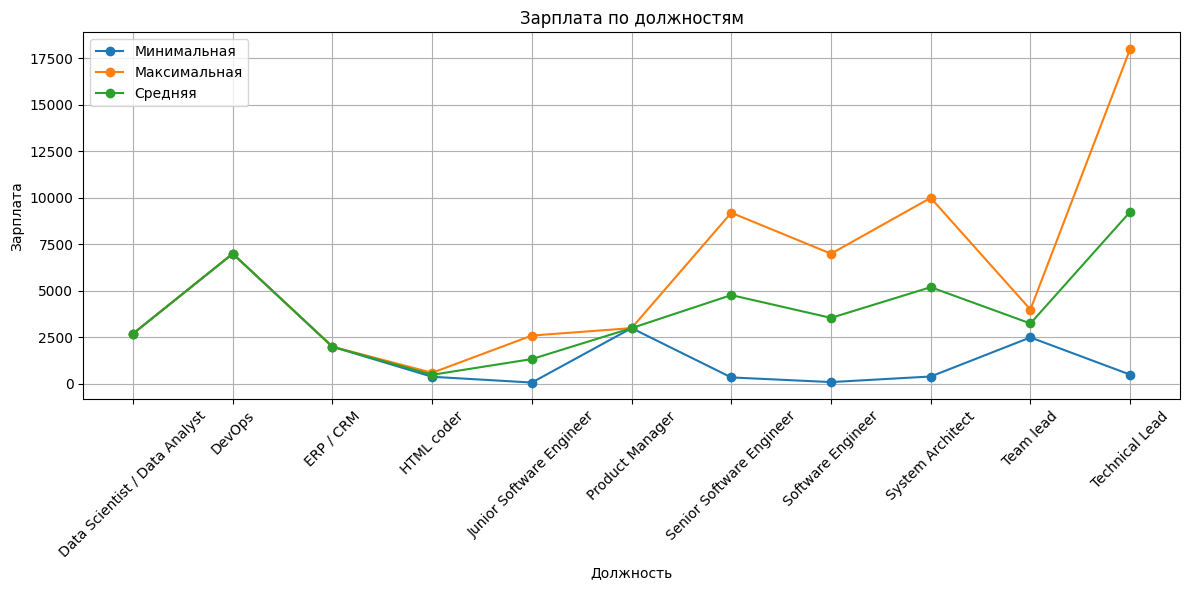

In [33]:
import matplotlib.pyplot as plt

positions = min_max_salaries.index
min_salaries = min_max_salaries['min']
max_salaries = min_max_salaries['max']
avg_salaries = min_max_salaries['avg']

x = list(range(len(positions)))

plt.figure(figsize=(12, 6))

plt.plot(x, min_salaries, marker='o', label='Минимальная')
plt.plot(x, max_salaries, marker='o', label='Максимальная')
plt.plot(x, avg_salaries, marker='o', label='Средняя')

plt.xticks(x, positions, rotation=45)
plt.xlabel('Должность')
plt.ylabel('Зарплата')
plt.title('Зарплата по должностям')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()